In [1]:
from PIL import Image
im = Image.open("HoFeO3.PNG")
im.size

(226, 226)

In [2]:
import ase.io
hfo = ase.io.read('HoFeO3.cif')
print(hfo)

Atoms(symbols='Ho4Fe4O12', pbc=True, cell=[5.278, 5.591, 7.602])


In [3]:
import LaueTools.readmccd as rmccd

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
Missing library libtiff, Please install: pylibtiff if you need open some tiff images
module Image / PIL is not installed
LaueToolsProjectFolder /home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/LaueTools
you are using python 3
Cython compiled module 'gaussian2D' for fast computation is not installed!
module Image / PIL is not installed


In [4]:
#from LaueTools.lauecore import getLaueSpots
#getLaueSpots(1.0, 5.0, crystalsParams, linestowrite, kf_direction='Z>0', OpeningAngleCollection=22.0, fastcompute=0, ResolutionAngstrom=False, fileOK=1, verbose=1, dictmaterials=None)
import numpy as np
from LaueTools.lauecore import calcSpots_fromHKLlist
import LaueTools.CrystalParameters as CP
UB=np.identity(3)
B0=CP.calc_B_RR(hfo.get_cell_lengths_and_angles())
HKLs=[]
for i in range(-30,30):
    for j in range(-30,30):
        for k in range(-30,30):
            HKLs.append([i,j,k])
HKLs=np.array(HKLs)
dictCCD = {}
dictCCD["dim"] = im.size # pixels x pixels
dd = 28 # mm
dictCCD["CCDparam"] = [dd,im.size[0]/2,im.size[1]/2,0,90] # xbet, xgam (az)
dictCCD["pixelsize"] = 0.15 # pixel size (mm?)
dictCCD["kf_direction"] = 'X<0' # back-reflection
spots = calcSpots_fromHKLlist(UB, B0, HKLs, dictCCD)

Cython compiled module for fast computation of Laue spots is not installed!


In [5]:
(H, K, L, Qx, Qy, Qz, X, Y, twthe, chi, Energy) = spots

In [6]:
subset = []
for i in range(0,len(X)):
    if X[i] >= 0 and X[i] < im.size[0] and Y[i] >= 0 and Y[i] < im.size[1] and Energy[i]>=5.0 and Energy[i]<14.0:
        subset.append([H[i],K[i],L[i],X[i],Y[i]])

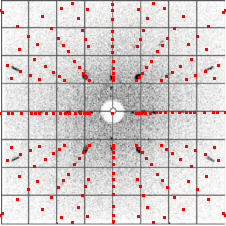

In [7]:
from PIL import ImageDraw
im = Image.open("HoFeO3.PNG")
draw = ImageDraw.Draw(im)
for i in range(0,len(subset)):
    draw.ellipse((subset[i][3:5][0]-1,subset[i][3:5][1]-1,subset[i][3:5][0]+1,subset[i][3:5][1]+1),fill="red",outline="red")
im

In [8]:
import numpy as np
from LaueTools.lauecore import calcSpots_fromHKLlist
import LaueTools.CrystalParameters as CP
def calcLaue(detdimxy,latticeparam,UB=np.identity(3),dd=30,xgam=0.0,Elow=5.0,Ehigh=15.0):
    B0=CP.calc_B_RR(latticeparam)
    HKLs=[]
    for i in range(-30,30):
        for j in range(-30,30):
            for k in range(-30,30):
                HKLs.append([i,j,k])
    HKLs=np.array(HKLs)
    dictCCD = {}
    dictCCD["dim"] = detdimxy # pixels x pixels
    dictCCD["CCDparam"] = [dd,detdimxy[0]/2,detdimxy[1]/2,0,xgam] # xbet, xgam (az)
    dictCCD["pixelsize"] = 0.15 # pixel size (mm?)
    dictCCD["kf_direction"] = 'X<0' # back-reflection
    spots = calcSpots_fromHKLlist(UB, B0, HKLs, dictCCD)
    (H, K, L, Qx, Qy, Qz, X, Y, twthe, chi, Energy) = spots
    subset = []
    for i in range(0,len(X)):
        if X[i] >= 0 and X[i] < detdimxy[0] and Y[i] >= 0 and Y[i] < detdimxy[1] and Energy[i]>=Elow and Energy[i]<Ehigh:
            subset.append([H[i],K[i],L[i],X[i],Y[i]])
    return subset

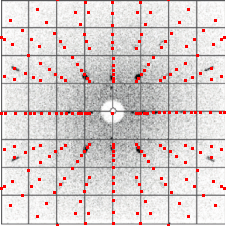

In [9]:
subset = calcLaue(im.size,hfo.get_cell_lengths_and_angles(),xgam=90)
im = Image.open("HoFeO3.PNG")
draw = ImageDraw.Draw(im)
for i in range(0,len(subset)):
    draw.ellipse((subset[i][3:5][0]-1,subset[i][3:5][1]-1,subset[i][3:5][0]+1,subset[i][3:5][1]+1),fill="red",outline="red")
im

In [10]:
with open("Nb3Br8.hs2","r") as f:
    npim2 = np.array(np.fromfile(f,">u2",count=256*256,sep='').reshape((256,256)),dtype=np.uint16)
print(npim2.shape)

(256, 256)


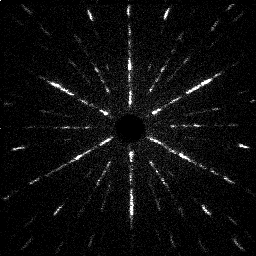

In [11]:
im2=Image.fromarray(npim2/20).convert("RGB")
im2

/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/LaueTools/LaueGeometry.py:734: RuntimeWarning: divide by zero encountered in true_divide
  Energy = CST_CONV_LAMBDA_KEV * norme_qflab ** 2 / (2.0 * np.sin(th0 * DEG))
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/LaueTools/LaueGeometry.py:734: RuntimeWarning: invalid value encountered in true_divide
  Energy = CST_CONV_LAMBDA_KEV * norme_qflab ** 2 / (2.0 * np.sin(th0 * DEG))
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/LaueTools/lauecore.py:1626: RuntimeWarning: divide by zero encountered in true_divide
  Energy = (CST_ENERGYKEV) * (-0.5 * Qsquare / tQ[0])


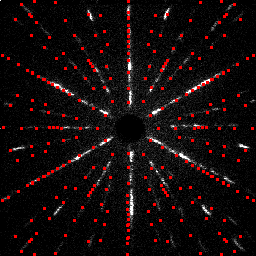

In [12]:
nb3br8 = ase.io.read('Nb3Br8.cif')
subset = calcLaue(im2.size,nb3br8.get_cell_lengths_and_angles(),dd=12,UB=np.array([[0,0,-1],[0,1,0],[1,0,0]]),Ehigh=10,xgam=0)
im2=Image.fromarray(npim2/20).convert("RGB")
draw = ImageDraw.Draw(im2)
for i in range(0,len(subset)):
    draw.ellipse((subset[i][3:5][0]-1,subset[i][3:5][1]-1,subset[i][3:5][0]+1,subset[i][3:5][1]+1),fill="red",outline="red")
im2